[*********************100%%**********************]  1 of 1 completed


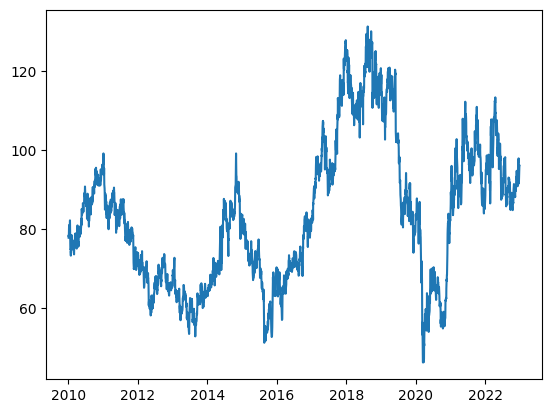

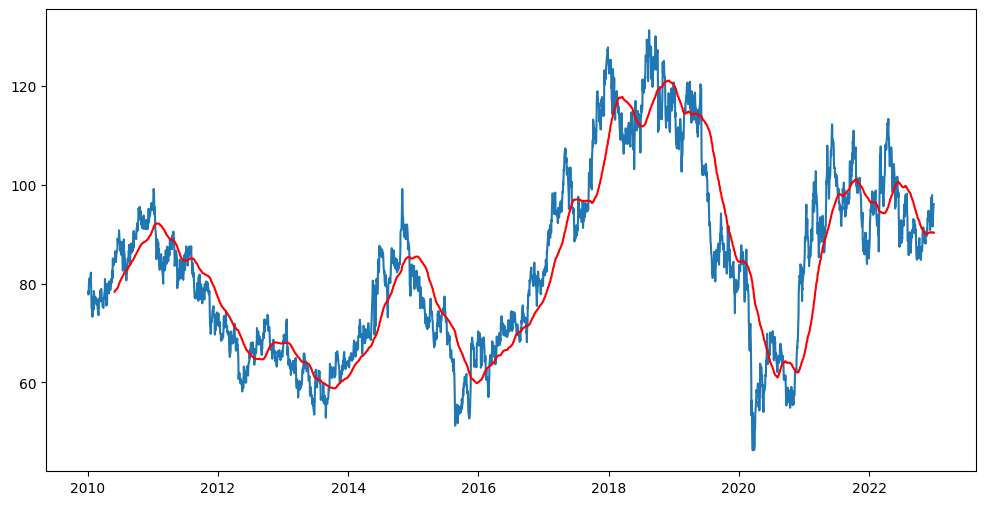

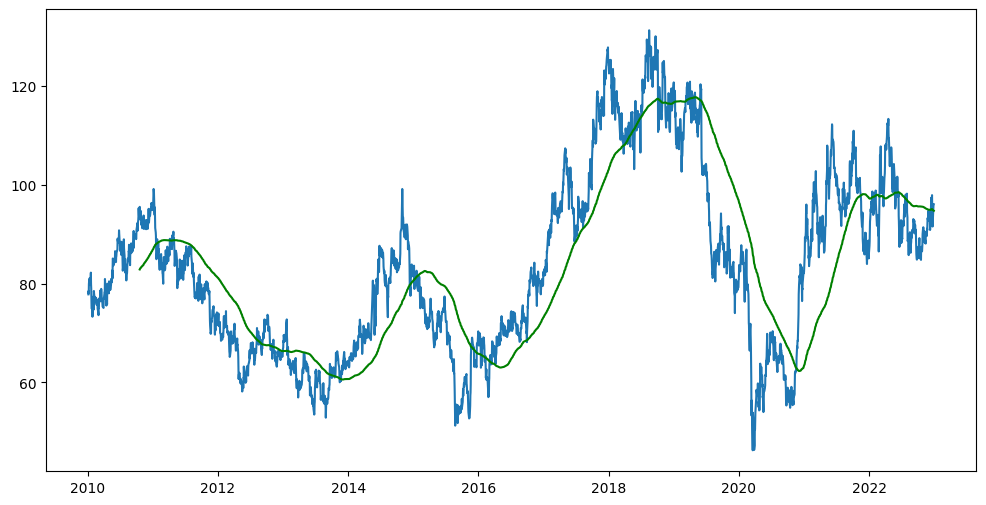

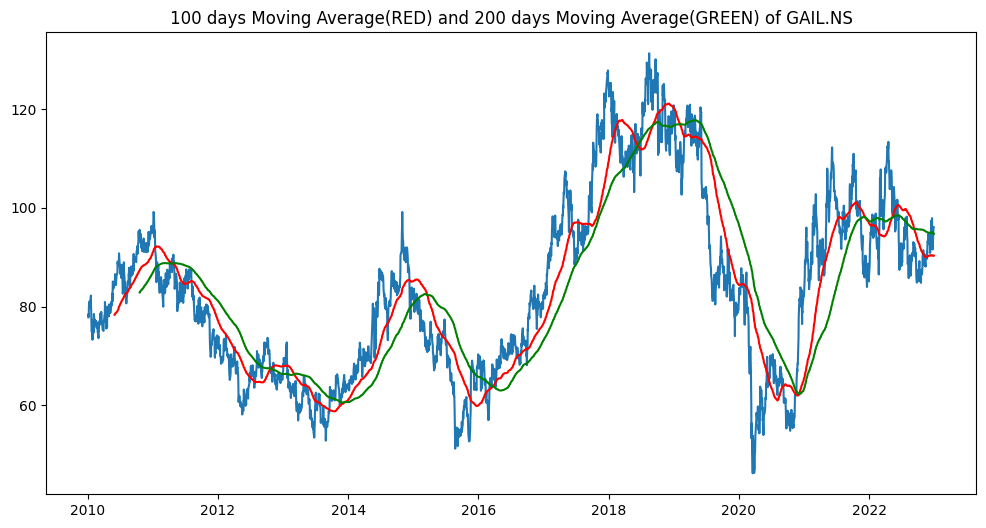

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt 
import yfinance as yf
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


# Load Data
company = 'GAIL.NS'
start = dt.datetime(2010, 1, 1)
end = dt.datetime(2023, 1, 1)

data = yf.download(company, start=start, end=end)

# Plot Closing Prices
plt.plot(data['Close'])
plt.show()

# Calculate 100 days moving average
ma100 = data['Close'].rolling(100).mean()

# Plot Closing Prices with 100 days moving average
plt.figure(figsize=(12, 6))
plt.plot(data['Close'])
plt.plot(ma100, 'r')
plt.show()

# Calculate 200 days moving average
ma200 = data['Close'].rolling(200).mean()

# Plot Closing Prices with 200 days moving average
plt.figure(figsize=(12, 6))
plt.plot(data['Close'])
plt.plot(ma200, 'g')
plt.show()

# Plot Closing Prices with 100 and 200 days moving averages
plt.figure(figsize=(12, 6))
plt.title(f"100 days Moving Average(RED) and 200 days Moving Average(GREEN) of {company}")
plt.plot(data['Close'])
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.show()

# Prepare Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

prediction_days = 60

x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [4]:
#Build The Model

model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)



Epoch 1/25

99/99 [==============================] - 8s 40ms/step - loss: 0.0140
Epoch 2/25
99/99 [==============================] - 5s 50ms/step - loss: 0.0045
Epoch 3/25
99/99 [==============================] - 4s 41ms/step - loss: 0.0038
Epoch 4/25
99/99 [==============================] - 4s 41ms/step - loss: 0.0038
Epoch 5/25
99/99 [==============================] - 4s 42ms/step - loss: 0.0037
Epoch 6/25
99/99 [==============================] - 4s 41ms/step - loss: 0.0033
Epoch 7/25
99/99 [==============================] - 4s 42ms/step - loss: 0.0034
Epoch 8/25
99/99 [==============================] - 5s 46ms/step - loss: 0.0029
Epoch 9/25
99/99 [==============================] - 5s 51ms/step - loss: 0.0026
Epoch 10/25
99/99 [==============================] - 5s 52ms/step - loss: 0.0026
Epoch 11/25
99/99 [==============================] - 5s 52ms/step - loss: 0.0026
Epoch 12/25
99/99 [==============================] - 5s 52ms/step - loss: 0.0023
Epoch 13/25
99/99 [===============

In [5]:
# Save the model in the native Keras format 
model.save('model.h5')  

c:\Users\Saiban N Pagarkar\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


[*********************100%%**********************]  1 of 1 completed
[[[0.48568634]
  [0.47745099]
  [0.50509803]
  ...
  [0.58274516]
  [0.5845098 ]
  [0.58568634]]

 [[0.47745099]
  [0.50509803]
  [0.46980391]
  ...
  [0.5845098 ]
  [0.58568634]
  [0.48666667]]

 [[0.50509803]
  [0.46980391]
  [0.47156863]
  ...
  [0.58568634]
  [0.48666667]
  [0.49725492]]

 ...

 [[1.37509803]
  [1.38098039]
  [1.34627454]
  ...
  [1.60098054]
  [1.61215697]
  [1.68039231]]

 [[1.38098039]
  [1.34627454]
  [1.35039226]
  ...
  [1.61215697]
  [1.68039231]
  [1.649804  ]]

 [[1.34627454]
  [1.35039226]
  [1.33803928]
  ...
  [1.68039231]
  [1.649804  ]
  [1.699804  ]]]
18/18 [==============================] - 1s 27ms/step
Mean Squared Error (MSE): 20.37285633829809
Root Mean Squared Error (RMSE): 4.5136300621892005
Mean Absolute Error (MAE): 3.01472631464704


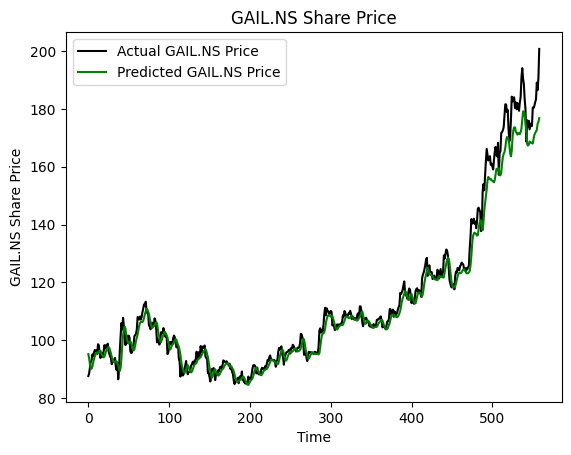

1/1 [==============================] - 0s 47ms/step
Prediction of Next Day: [[181.04097]]


In [7]:




# Test the model accuracy on the Existing Data

# Load Test Data
test_start = dt.datetime(2022, 1, 1)
test_end = dt.datetime.now()

test_data = yf.download(company, start=test_start, end=test_end)
actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)

# Make prediction on Test data

x_test = []

for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
print(x_test)
predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

mse = mean_squared_error(actual_prices, predicted_prices)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actual_prices, predicted_prices)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

# Plot the test predictions
plt.plot(actual_prices, color="black", label=f"Actual {company} Price")
plt.plot(predicted_prices, color="green", label=f"Predicted {company} Price")
plt.title(f"{company} Share Price")
plt.xlabel('Time')
plt.ylabel(f'{company} Share Price')
plt.legend()
plt.show()

# Predict Next Day

# Predict Next Day
real_data = [model_inputs[len(model_inputs) - prediction_days:len(model_inputs), 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"Prediction of Next Day: {prediction}")

# # Define the actual prices for the next day
# actual_price_next_day_lstm = test_data['Close'].iloc[-1]

# # Calculate MAE
# mae_lstm = mean_absolute_error([actual_price_next_day_lstm], prediction)
# print("Mean Absolute Error (MAE):", mae_lstm)

